# 机器学习算法（三）：K近邻(k-nearest neighbors)初探

## 1 KNN的介绍和应用
### 1.1 KNN的介绍

kNN(k-nearest neighbors)，中文翻译K近邻。我们常常听到一个故事：如果要了解一个人的经济水平，只需要知道他最好的5个朋友的经济能力，
对他的这五个人的经济水平求平均就是这个人的经济水平。这句话里面就包含着kNN的算法思想。

<img src='https://tianchi-media.oss-cn-beijing.aliyuncs.com/DSW/3K/knn_demo.png'/>

示例 ：如上图，绿色圆要被决定赋予哪个类，是红色三角形还是蓝色四方形？如果K=3，由于红色三角形所占比例为2/3，绿色圆将被赋予红色三角形那个类，如果K=5，由于蓝色四方形比例为3/5，因此绿色圆被赋予蓝色四方形类。

**1) KNN建立过程**

    1 给定测试样本，计算它与训练集中的每一个样本的距离。
    2 找出距离近期的K个训练样本。作为测试样本的近邻。
    3 依据这K个近邻归属的类别来确定样本的类别。


**2) 类别的判定**

①投票决定，少数服从多数。取类别最多的为测试样本类别。

②加权投票法，依据计算得出距离的远近，对近邻的投票进行加权，距离越近则权重越大，设定权重为距离平方的倒数。

### 1.2 KNN的应用
KNN虽然很简单，但是人们常说"大道至简"，一句"物以类聚，人以群分"就能揭开其面纱，看似简单的KNN即能做分类又能做回归，
还能用来做数据预处理的缺失值填充。由于KNN模型具有很好的解释性，一般情况下对于简单的机器学习问题，我们可以使用KNN作为
Baseline，对于每一个预测结果，我们可以很好的进行解释。推荐系统的中，也有着KNN的影子。例如文章推荐系统中，
对于一个用户A，我们可以把和A最相近的k个用户，浏览过的文章推送给A。

机器学习领域中，数据往往很重要，有句话叫做:"数据决定任务的上限, 模型的目标是无限接近这个上限"。
可以看到好的数据非常重要，但是由于各种原因，我们得到的数据是有缺失的，如果我们能够很好的填充这些缺失值，
就能够得到更好的数据，以至于训练出来更鲁棒的模型。接下来我们就来看看KNN如果做分类，怎么做回归以及怎么填充空值。


## 2 实验室手册

### 2.1 实验环境

```
1. python3.7
2. numpy >= '1.16.4'
3. sklearn >= '0.23.1'
```

### 2.2 学习目标
1. 了解KNN怎么做分类问题
2. 了解KNN如何做回归
3. 了解KNN怎么做空值填充, 如何使用knn构建带有空值的pipeline

### 2.3 代码流程
1. 二维数据集--knn分类
    + Step1: 库函数导入
    + Step2: 数据导入 
    + Step3: 模型训练&可视化
    + Step4: 原理简析

2. 莺尾花数据集--kNN分类
    + Step1: 库函数导入
    + Step2: 数据导入&分析 
    + Step3: 模型训练 
    + Step4: 模型预测&可视化
     
3. 模拟数据集--kNN回归
    + Step1: 库函数导入
    + Step2: 数据导入&分析 
    + Step3: 模型训练&可视化

4. 马绞痛数据--kNN数据预处理+kNN分类pipeline
    + Step1: 库函数导入
    + Step2: 数据导入&分析 
    + Step3: KNNImputer空值填充--使用和原理介绍
    + Step4: KNNImputer空值填充--欧式距离的计算
    + Step5: 基于pipeline模型预测&可视化

## 2.4 算法实战

### 2.4.1 Demo数据集--kNN分类

**Step1: 库函数导入**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

**Step2: 数据导入**

In [2]:
# 使用鸢尾花数据集的前两维数据，便于数据可视化
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target


**Step3: 模型训练&可视化**

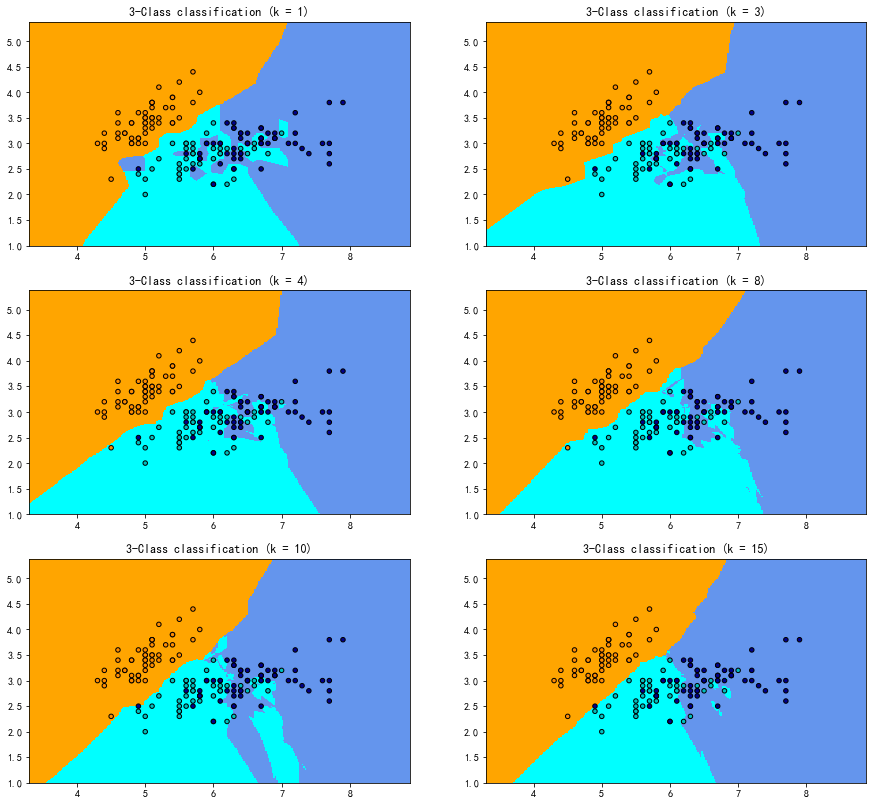

In [3]:
import warnings
warnings.filterwarnings('ignore')

k_list = [1, 3, 4, 8, 10, 15]
h = .02
#创建不同颜色的画布
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold  = ListedColormap(['darkorange', 'c', 'darkblue'])

plt.figure(figsize=(15, 14))
# 根据不同的k值进行可视化
for ind, k in enumerate(k_list):
    clf = KNeighborsClassifier(k)
    clf.fit(X, y)
    # 画出决策边界
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # 根据边界填充颜色
    Z = Z.reshape(xx.shape)

    plt.subplot(321+ind)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # 数据点可视化到画布
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolors='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title('3-Class classification (k = %i)'%k)

plt.show()

**Step4: 原理简析**

如果选择较小的K值，就相当于用较小的领域中的训练实例进行预测，例如当k=1的时候，在分界点位置的数据很容易受到局部的影响，图中蓝色的部分中还有部分绿色块，主要是数据太局部敏感。当k=15的时候，不同的数据基本根据颜色分开，当时进行预测的时候，会直接落到对应的区域，模型相对更加鲁棒。


### 2.4.2 莺尾花数据集--kNN分类

**Step1: 库函数导入**

In [4]:
import numpy as np
# 加载莺尾花数据集
from sklearn import datasets
# 导入KNN分类器
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

**Step2: 数据导入&分析**

In [5]:
# 导入数据集
iris = datasets.load_iris()

X = iris.data
y = iris.target 
# 得到训练集合和验证集合，8：2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Step3: 模型训练**

这里我们设置参数k(n_neighbors)=5, 使用欧式距离(metric=minkowski & p=2)

In [6]:
# 训练模型
clf = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
clf.fit(X_train, y_train)

KNeighborsClassifier()

**Step4:模型预测&可视化**

In [7]:
X_pred = clf.predict(X_test)
acc = sum(X_pred == y_test) / X_pred.shape[0]
print('预测的准确率ACC: %.3f'%acc)

预测的准确率ACC: 0.967


In [8]:
X_pred

array([1, 2, 2, 0, 0, 1, 2, 1, 1, 1, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0,
       1, 1, 2, 0, 0, 2, 0, 2])

In [9]:
y_test

array([1, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0,
       1, 1, 2, 0, 0, 2, 0, 2])

我们用表格来看一下KNN的训练和预测过程。这里用表格进行可视化：

1. 训练数据[表格对应list]

|feat_1|feat_2|feat_3|feat_4|label|
|---|---|---|---|---|
|5.1| 3.5| 1.4| 0.2| **0** |
|4.9| 3. | 1.4| 0.2| **0** |
|4.7| 3.2| 1.3| 0.2| **0** |
|4.6| 3.1| 1.5| 0.2| **0** |
|6.4| 3.2| 4.5| 1.5| **1** |
|6.9| 3.1| 4.9| 1.5| **1** |
|5.5| 2.3| 4. | 1.3| **1** |
|6.5| 2.8| 4.6| 1.5| **1** |
|5.8| 2.7| 5.1| 1.9| **2** |
|7.1| 3. | 5.9| 2.1| **2** |
|6.3| 2.9| 5.6| 1.8| **2** |
|6.5| 3. | 5.8| 2.2| **2** |

2. knn.fit(X, y)的过程可以简单认为是表格存储

|feat_1|feat_2|feat_3|feat_4|label|
|---|---|---|---|---|
|5.1| 3.5| 1.4| 0.2| **0** |
|4.9| 3. | 1.4| 0.2| **0** |
|4.7| 3.2| 1.3| 0.2| **0** |
|4.6| 3.1| 1.5| 0.2| **0** |
|6.4| 3.2| 4.5| 1.5| <font color="coral">**1**</font> |
|6.9| 3.1| 4.9| 1.5| <font color="coral">**1**</font> |
|5.5| 2.3| 4. | 1.3| <font color="coral">**1**</font> |
|6.5| 2.8| 4.6| 1.5| <font color="coral">**1**</font> |
|5.8| 2.7| 5.1| 1.9| <font color="lilac">**2**</font> |
|7.1| 3. | 5.9| 2.1| <font color="lilac">**2**</font> |
|6.3| 2.9| 5.6| 1.8| <font color="lilac">**2**</font> |
|6.5| 3. | 5.8| 2.2| <font color="lilac">**2**</font> |

3. knn.predict(x)预测过程会计算x和所有训练数据的距离
这里我们使用欧式距离进行计算, 预测过程如下

$$
x = [5. , 3.6, 1.4, 0.2] \\ 
y=0
$$

step1: 计算x和所有训练数据的距离

|feat_1|feat_2|feat_3|feat_4|距离|label|
|---|---|---|---|---|---|
|5.1| 3.5| 1.4| 0.2|<font color="green">**0.14142136**</font>| **0** |
|4.9| 3. | 1.4| 0.2|<font color="green">**0.60827625**</font>| **0** |
|4.7| 3.2| 1.3| 0.2|<font color="green">**0.50990195**</font>| **0** |
|4.6| 3.1| 1.5| 0.2|<font color="green">**0.64807407**</font>| **0** |
|6.4| 3.2| 4.5| 1.5|<font color="green">**3.66333182**</font>| <font color="coral">**1**</font> |
|6.9| 3.1| 4.9| 1.5|<font color="green">**4.21900462**</font>| <font color="coral">**1**</font> |
|5.5| 2.3| 4. | 1.3|<font color="green">**3.14801525**</font>| <font color="coral">**1**</font> |
|6.5| 2.8| 4.6| 1.5|<font color="green">**3.84967531**</font>| <font color="coral">**1**</font> |
|5.8| 2.7| 5.1| 1.9|<font color="green">**4.24617475**</font>| <font color="lilac">**2**</font> |
|7.1| 3. | 5.9| 2.1|<font color="green">**5.35070089**</font>| <font color="lilac">**2**</font> |
|6.3| 2.9| 5.6| 1.8|<font color="green">**4.73075047**</font>| <font color="lilac">**2**</font> |
|6.5| 3. | 5.8| 2.2|<font color="green">**5.09607692**</font>| <font color="lilac">**2**</font> |


step2: 根据距离进行编号排序

|距离升序编号|feat_1|feat_2|feat_3|feat_4|距离|label|
|---|---|---|---|---|---|---|
|<font color="indigo">**1**</font>|5.1| 3.5| 1.4| 0.2|<font color="green">**0.14142136**</font>| **0** |
|<font color="indigo">**3**</font>|4.9| 3. | 1.4| 0.2|<font color="green">**0.60827625**</font>| **0** |
|<font color="indigo">**2**</font>|4.7| 3.2| 1.3| 0.2|<font color="green">**0.50990195**</font>| **0** |
|<font color="indigo">**4**</font>|4.6| 3.1| 1.5| 0.2|<font color="green">**0.64807407**</font>| **0** |
|<font color="indigo">**6**</font>|6.4| 3.2| 4.5| 1.5|<font color="green">**3.66333182**</font>| <font color="coral">**1**</font> |
|<font color="indigo">**8**</font>|6.9| 3.1| 4.9| 1.5|<font color="green">**4.21900462**</font>| <font color="coral">**1**</font> |
|<font color="indigo">**5**</font>|5.5| 2.3| 4. | 1.3|<font color="green">**3.14801525**</font>| <font color="coral">**1**</font> |
|<font color="indigo">**7**</font>|6.5| 2.8| 4.6| 1.5|<font color="green">**3.84967531**</font>| <font color="coral">**1**</font> |
|<font color="indigo">**9**</font>|5.8| 2.7| 5.1| 1.9|<font color="green">**4.24617475**</font>| <font color="lilac">**2**</font> |
|<font color="indigo">**12**</font>|7.1| 3. | 5.9| 2.1|<font color="green">**5.35070089**</font>| <font color="lilac">**2**</font> |
|<font color="indigo">**10**</font>|6.3| 2.9| 5.6| 1.8|<font color="green">**4.73075047**</font>| <font color="lilac">**2**</font> |
|<font color="indigo">**11**</font>|6.5| 3. | 5.8| 2.2|<font color="green">**5.09607692**</font>| <font color="lilac">**2**</font> |


step3: 我们设置k=5,选择距离最近的k个样本进行投票

|距离升序编号|feat_1|feat_2|feat_3|feat_4|距离|label|
|---|---|---|---|---|---|---|
|<font color="red">**1**</font>|5.1| 3.5| 1.4| 0.2|<font color="red">**0.14142136**</font>| **0** |
|<font color="red">**3**</font>|4.9| 3. | 1.4| 0.2|<font color="red">**0.60827625**</font>| **0** |
|<font color="red">**2**</font>|4.7| 3.2| 1.3| 0.2|<font color="red">**0.50990195**</font>| **0** |
|<font color="red">**4**</font>|4.6| 3.1| 1.5| 0.2|<font color="red">**0.64807407**</font>| **0** |
|<font color="indigo">**6**</font>|6.4| 3.2| 4.5| 1.5|<font color="green">**3.66333182**</font>| <font color="coral">**1** |
|<font color="indigo">**8**</font>|6.9| 3.1| 4.9| 1.5|<font color="green">**4.21900462**</font>| <font color="coral">**1** |
|<font color="red">**5**</font>|5.5| 2.3| 4. | 1.3|<font color="red">**3.14801525**</font>| <font color="coral">**1** </font>|
|<font color="indigo">**7**</font>|6.5| 2.8| 4.6| 1.5|<font color="green">**3.84967531**</font>| <font color="coral">**1**</font> |
|<font color="indigo">**9**</font>|5.8| 2.7| 5.1| 1.9|<font color="green">**4.24617475**</font>| <font color="lilac">**2**</font> |
|<font color="indigo">**12**</font>|7.1| 3. | 5.9| 2.1|<font color="green">**5.35070089**</font>| <font color="lilac">**2**</font> |
|<font color="indigo">**10**</font>|6.3| 2.9| 5.6| 1.8|<font color="green">**4.73075047**</font>| <font color="lilac">**2**</font> |
|<font color="indigo">**11**</font>|6.5| 3. | 5.8| 2.2|<font color="green">**5.09607692**</font>| <font color="lilac">**2**</font> |


step4: k近邻的label进行投票

nn_labels = [0, 0, 0, 0, 1] --> 得到最后的结果0。
